# Autoencoders

Comenzamos instalando la librería *tensorflow* con la herramienta *pip* en el entorno virtual en el que trabajaremos. Para ello, realizamos un simple *pip install tensorflow* y mostramos la versión instalada:

In [1]:
import tensorflow as tf

tf.__version__

'2.12.0'

A continuación, cargamos el conjunto de datos *MNIST* que trae la propia biblioteca de Keras. Se trata de un conjunto de datos que contiene información de dígitos escritos a mano con su correspondiente etiqueta.

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Nótese que, en este caso, al tratarse de un modelo de aprendizaje no supervisado, las etiquetas nos son indiferentes. Una vez hemos cargado los datos, veamos las dimensiones:

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

Esto significa que en el conjunto de train tenemos $60000$ observaciones, en forma de matrices $28x28$. Mientras tanto, en el conjunto de test tenemos únicamente $10000$ de ellas.

Una vez que conocemos cómo está almacenada la información, procedemos a redimensionar los datos para convertir las matrices asociadas a cada instancia en *arrays* unidimensionales:

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

Antes de comenzar a entrenar el modelo, debemos llevar a cabo un reescalado de los datos para evitar problemas de inestabilidad numérica. Puesto que sabemos que los datos son provenientes de imágenes, sabemos que los valores de los arrays se mueven entre $0$ y $255$. Si dividimos los valores entre $255$, obtendremos valores que se mueven en el rango $[0,1]$:

In [7]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Una vez tenemos los datos tratados, podemos comenzar a construir el Autoencoder:

In [32]:
import keras
from keras import layers

code_size = 32

input_image = keras.Input(shape=(784,))
hiddenlayer_1 = layers.Dense(128, activation='relu')(input_image)

code_layer = layers.Dense(code_size, activation='relu')(hiddenlayer_1)

hiddenlayer_2 = layers.Dense(128, activation='relu')(code_layer)
output_image = layers.Dense(784, activation='sigmoid')(hiddenlayer_2)

autoencoder_model = keras.Model(input_image, output_image)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder_model.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1371
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0980
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0926
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0900
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0854
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0848
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843
Epoch 11/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839
Epoch 12/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836
E

Veamos cómo ha sido el proceso de aprendizaje de los parámetros del modelo y cómo ha sido su efecto en las diferentes pérdidas:

In [33]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

In [34]:
model_history.head()

,loss,epoch
0,0.137106,0
1,0.098027,1
2,0.092624,2
3,0.089962,3
4,0.088260,4


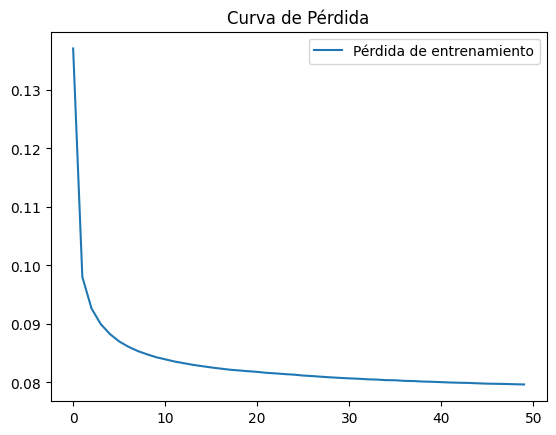

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_history['epoch'], model_history['loss'], label='Pérdida de entrenamiento')
plt.title('Curva de Pérdida')
plt.legend()
plt.show()

Veamos la acción del modelo sobre las $10$ primeras imágenes del conjunto de imágenes de test:

In [38]:
decoded_testimages = autoencoder.predict(X_test)

313/313 [==============================] - 0s 1ms/step


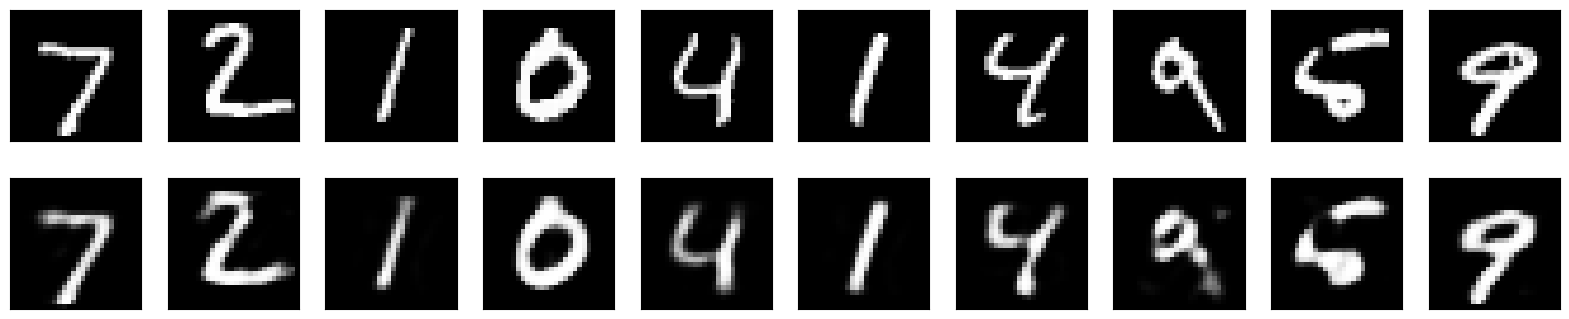

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i in range(10):

    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_testimages[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()